In [48]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../../results/extracted_csv/paper_openalex.csv")
df_2023 = df[df["publication_year"] == 2023]
df_acdc = df_2023[df_2023["dataset_used"] == "ACDC"]


/tmp/ipykernel_64546/2068007440.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  totals = counts.sum(level=0)


Text(0, 0.5, 'Count')

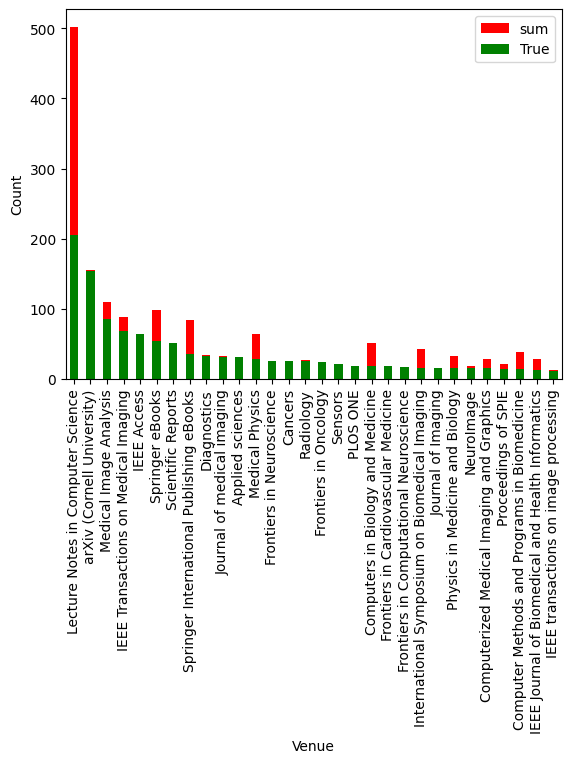

In [76]:
df = pd.read_csv("../../results/processed_csv/coverage.csv",index_col=0)
df = df[df["openalex"] == True]

venues = df["venue"].unique()
counts = df.groupby(["venue","is_oa"]).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)["openalex"]
counts = counts.fillna(0)
counts = counts.sort_values(by=[True],ascending=False)
counts = counts[:30]
counts["sum"] = counts[False] + counts[True]
counts["sum"].plot.bar(color="red")
counts[True].plot.bar(color="green")
plt.legend()
plt.xlabel('Venue')
plt.ylabel('Count')

In [18]:
url_base = "https://api.openalex.org/works/https://doi.org/"
paper_id = 1
for doi in df_acdc["DOI"]:
    url = url_base + doi 
    r_paper = requests.get(url)
    if r_paper.status_code == 200:
        r_paper_json = r_paper.json()
        fulltext_url = r_paper_json["open_access"]["oa_url"]
        if fulltext_url:
            r_fulltext = requests.get(fulltext_url,allow_redirects=True)
            if r_fulltext.status_code == 200:
                print(fulltext_url)
                open(f"../../results/papers_fulltext/{paper_id}.pdf","wb").write(r_fulltext.content)
                paper_id += 1
        if paper_id == 10:
            break
    else:
        print(f"Error {r_paper.status_code} for {doi}")

https://doi.org/10.1016/b978-0-32-385773-4.00009-5
https://journals.plos.org/digitalhealth/article/file?id=10.1371/journal.pdig.0000159&type=printable
https://ieeexplore.ieee.org/ielx7/6287639/10005208/10005274.pdf
https://iopscience.iop.org/article/10.1088/1361-6560/acb19a/pdf
https://doi.org/10.1016/j.patcog.2023.109318
https://ieeexplore.ieee.org/ielx7/6287639/10005208/10021322.pdf
https://www.nature.com/articles/s41598-023-28348-y.pdf
https://www.frontiersin.org/articles/10.3389/fphys.2023.1027076/pdf
https://www.mdpi.com/2306-5354/10/2/166/pdf?version=1674889337
